# Profile data from Tesla V100

First we load the data from the CSV file in folder data/.

In [1]:
#import the libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read the CSV
volta_raw_df = pd.read_csv("data/profile_arch_Volta.csv", index_col=0)

# Rename MMA columns to the correct names
volta_raw_df = volta_raw_df.rename(columns={"HGEMM-WMMA": "HGEMM-MMA", "FGEMM-WMMA": "FGEMM-MMA"})

The volta_raw_df should contain the quantitative metrics (i.g., instruction count) and qualitative metrics (i.g., IPC)

In [3]:
volta_raw_df

,HYOLOV3,FYOLOV3,DYOLOV3,HGEMM,FGEMM,DGEMM,HGEMM-MMA,FGEMM-MMA,HLAVA,FLAVA,...,DADD,HFMA,FFMA,DFMA,HMUL,FMUL,DMUL,IMUL,IADD,IMAD
metric,,,,,,,,,,,,,,,,,,,,,
flop_count_dp_fma,0.000000e+00,0.000000e+00,7.361252e+10,0.000000e+00,0.000000e+00,4.398047e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.048000e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flop_count_dp_mul,0.000000e+00,0.000000e+00,4.789678e+08,0.000000e+00,0.000000e+00,2.684355e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.048000e+13,0.000000e+00,0.000000e+00,0.000000e+00
flop_count_dp_add,0.000000e+00,0.000000e+00,2.478521e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.048000e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flop_count_sp_add,4.155735e+08,4.291148e+08,8.574833e+07,0.000000e+00,8.053064e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.051727e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flop_count_sp_mul,3.627191e+08,5.767023e+08,1.677213e+08,0.000000e+00,1.073742e+09,0.000000e+00,0.000000e+00,2.684355e+08,2.930946e+09,2.344822e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.047999e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flop_count_sp_fma,7.793560e+08,7.486508e+10,2.553573e+08,0.000000e+00,4.398047e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.689514e+10,...,0.000000e+00,0.000000e+00,2.048000e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flop_count_hp_add,8.390615e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.758568e+10,0.000000e+00,...,0.000000e+00,4.096000e+04,0.000000e+00,0.000000e+00,2.048000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flop_count_hp_mul,1.011876e+08,0.000000e+00,0.000000e+00,1.342177e+08,0.000000e+00,0.000000e+00,1.342177e+08,0.000000e+00,1.172508e+10,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.024000e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flop_count_hp_fma,3.741503e+10,0.000000e+00,0.000000e+00,2.199023e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.568797e+10,0.000000e+00,...,0.000000e+00,1.024000e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [4]:
# Let's use the metrics and benchmarks names standardized
from scripts.common import METRIC_NAMES as metric_names, STANDARD_NAMES_VOLTA as std_names
metric_names


{'flop_count_dp_fma': 'DFMA',
 'flop_count_dp_mul': 'DMUL',
 'flop_count_dp_add': 'DADD',
 'flop_count_sp_add': 'FADD',
 'flop_count_sp_mul': 'FMUL',
 'flop_count_sp_fma': 'FFMA',
 'flop_count_sp_special': 'FSPC',
 'flop_count_hp_add': 'HADD',
 'flop_count_hp_mul': 'HMUL',
 'flop_count_hp_fma': 'HFMA',
 'inst_compute_ld_st': 'LDST',
 'inst_control': 'IF',
 'inst_inter_thread_communication': 'THCOMM',
 'inst_misc': 'MISC',
 'inst_bit_convert': 'BITCONV',
 'atomic_transactions': 'ATOMIC',
 'GPR': 'GPR',
 'tensor_count': 'MMA',
 'inst_integer': 'INT'}

In [5]:
std_names

{'hhotspot': 'HHOTSPOT',
 'fhotspot': 'FHOTSPOT',
 'dhotspot': 'DHOTSPOT',
 'hlava': 'HLAVA',
 'flava': 'FLAVA',
 'dlava': 'DLAVA',
 'hmxm': 'HMXM',
 'fmxm': 'FMXM',
 'dmxm': 'DMXM',
 'hgemm_cublas_notensor': 'HGEMM',
 'fgemm_cublas_notensor': 'FGEMM',
 'dgemm_cublas': 'DGEMM',
 'hgemm-mma': 'HGEMM-MMA',
 'fgemm-mma': 'FGEMM-MMA',
 'hdarknet_v3': 'HYOLOV3',
 'fdarknet_v3': 'FYOLOV3'}

Select only the metrics that represents the instructions executed

In [6]:
# Make the names standard
volta_raw_df.index = volta_raw_df.index.map(lambda m: metric_names[m] if m in metric_names else m)

# GPR is not in the standard list but will be necessary for the prediction process
volta_raw_df.loc["GPR"] = 0
volta_raw_df.loc["FSPC"] = 0


# calc the percentage for all metrics
metrics_percentage = volta_raw_df.loc[metric_names.values()] / volta_raw_df.loc[metric_names.values()].sum()

In [7]:
# All the benchmarks with the metrics percentage
metrics_percentage

,HYOLOV3,FYOLOV3,DYOLOV3,HGEMM,FGEMM,DGEMM,HGEMM-MMA,FGEMM-MMA,HLAVA,FLAVA,...,DADD,HFMA,FFMA,DFMA,HMUL,FMUL,DMUL,IMUL,IADD,IMAD
metric,,,,,,,,,,,,,,,,,,,,,
DFMA,0.000000,0.000000,5.380196e-01,0.000000,0.000000,0.822664,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,9.985373e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DMUL,0.000000,0.000000,3.500683e-03,0.000000,0.000000,0.000050,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.985373e-01,0.000000e+00,0.000000e+00,0.000000e+00
DADD,0.000000,0.000000,1.811503e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.985373e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
FADD,0.004712,0.003182,6.267179e-04,0.000000,0.000153,0.000000,0.000000,0.000000,0.000000,0.105026,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
FMUL,0.004112,0.004277,1.225843e-03,0.000000,0.000204,0.000000,0.000000,0.000378,0.014773,0.120029,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.985373e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
FFMA,0.008836,0.555209,1.866357e-03,0.000000,0.837267,0.000000,0.000000,0.000000,0.000000,0.240052,...,0.000000e+00,0.000000e+00,9.985373e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
FSPC,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
HADD,0.000951,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.088639,0.000000,...,0.000000e+00,3.994149e-09,0.000000e+00,0.000000e+00,1.997075e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
HMUL,0.001147,0.000000,0.000000e+00,0.000052,0.000000,0.000000,0.000383,0.000000,0.059099,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.985373e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


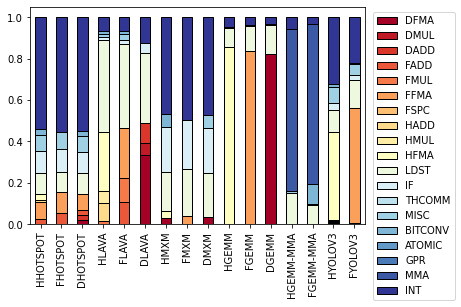

In [8]:
# Plotting without grouping the metrics classes
fig = plt.figure()
ax = fig.add_subplot(111)

metrics_percentage[std_names.values()].transpose().plot.bar(edgecolor="black",
                     colormap="RdYlBu",
                     ax=fig.gca(), stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

In [9]:
# To plot with grouped metrics, as in the paper
convert = {
    "FMA": ['DFMA', 'FFMA', 'HFMA'],
    "MUL": ['DMUL', 'FMUL', 'HMUL'],
    "ADD": ['DADD', 'FADD', 'HADD'],
    "INT": ["INT"],
    "MMA": ['MMA'],
    "LDST": ["LDST"],
    "FPSPC": ['FSPC'],
    "OTHERS": ['IF', 'THCOMM', 'MISC', 'BITCONV', 'ATOMIC', 'GPR']
}

# Select and sum in groups
metrics_percentages = metrics_percentage[std_names.values()]
v_converted = pd.DataFrame()
for cv, v in convert.items():
    v_converted[cv] = metrics_percentages.loc[v].sum()

# final df
v_converted

,FMA,MUL,ADD,INT,MMA,LDST,FPSPC,OTHERS
HHOTSPOT,0.108297,0.000000,0.038667,0.542324,0.000000,0.099329,0.0,0.211383
FHOTSPOT,0.100463,0.000000,0.053322,0.556144,0.000000,0.100764,0.0,0.189308
DHOTSPOT,0.096841,0.000000,0.051400,0.547922,0.000000,0.097131,0.0,0.206706
HLAVA,0.280689,0.073872,0.088639,0.066218,0.000000,0.444445,0.0,0.046138
FLAVA,0.240052,0.120029,0.105026,0.066909,0.000000,0.405877,0.0,0.062108
DLAVA,0.334549,0.059743,0.095588,0.125290,0.000000,0.335304,0.0,0.049526
HMXM,0.062494,0.000004,0.000000,0.468762,0.000000,0.187483,0.0,0.281257
FMXM,0.038088,0.000000,0.000000,0.495295,0.000000,0.228543,0.0,0.238074
DMXM,0.035082,0.000000,0.000000,0.473723,0.000000,0.210503,0.0,0.280692
HGEMM,0.855486,0.000052,0.000000,0.045538,0.000000,0.093806,0.0,0.005118


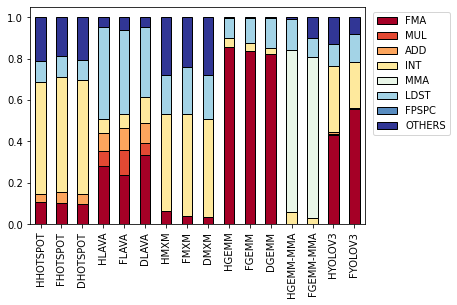

In [10]:
# Metrics percentages grouped
fig = plt.figure()
ax = fig.add_subplot(111)

v_converted.plot.bar(edgecolor="black",
                     colormap="RdYlBu",
                     ax=fig.gca(), stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

We can check also IPC and Occupancy information as presented in table I.

In [11]:

# Those lines contains the sum of all kernel executions on the profile
ipc_and_occ = volta_raw_df.loc[["ipc", "achieved_occupancy"], std_names.values()]

# We need divide by the number of kernel calls
ipc_and_occ /= volta_raw_df.loc["kernel_number", std_names.values()]
ipc_and_occ

,HHOTSPOT,FHOTSPOT,DHOTSPOT,HLAVA,FLAVA,DLAVA,HMXM,FMXM,DMXM,HGEMM,FGEMM,DGEMM,HGEMM-MMA,FGEMM-MMA,HYOLOV3,FYOLOV3
metric,,,,,,,,,,,,,,,,
ipc,0.471761,0.318620,0.170029,0.26,0.12,0.07,2.84,2.62,2.30,2.34,2.36,1.22,1.12,0.74,0.059658,0.080304
achieved_occupancy,93.180063,94.698422,95.141910,9.37,9.37,9.37,99.96,99.99,99.99,24.96,12.50,12.50,12.50,12.50,4.960278,5.376463


Let's load register usage and shared memory usage.


In [12]:
rf_and_shared = pd.read_csv("data/rf_shared_volta.csv", index_col=0)

# RF and Shared are the average for each benchmark. Share memory is in bytes
rf_and_shared["SHARED"] /= 1024
rf_and_shared

,RF,SHARED
HYOLOV3,54.917995,21.519360
FYOLOV3,38.962663,34.172678
DYOLOV3,126.995175,53.348333
HGEMM,127.000000,64.000000
FGEMM,134.000000,64.000000
DGEMM,234.000000,64.000000
HGEMM-TENSOR,139.000000,64.000000
FGEMM-TENSOR,250.000000,96.000000
HLAVA,255.000000,8.000000
FLAVA,255.000000,8.000000
